In [1]:
import sys
sys.path.append("../../src")

In [2]:
from solver import _get_mdc_latency
import numpy as np
from utility import LatencyUtility, LatencyStepUtility

In [13]:
p = 0.15
input_rates = np.array([40.0])
processing_times = np.array([p])
utility_fn = LatencyUtility(4*p)
# utility_fn = LatencyStepUtility(4*p)
latency_p = 99

xs = []
mdc_latencies = []
mdc_latencies_90 = []
mdc_latencies_99 = []
mdc_latencies_999 = []
mdc_utilities = []
mdc_utilities_90 = []
mdc_utilities_99 = []
mdc_utilities_999 = []
latencies = []
utilities = []
# for x in np.linspace(1.0, 10.0, 19):
for x in np.linspace(1.0, 11.0, 100):
# for x in np.linspace(1.0, 11.0, 11):
    latency = _get_mdc_latency(
        np.array([x]), input_rates, processing_times, latency_p)
    utility = utility_fn(latency)
    xs.append(x)
    mdc_latencies.append(latency)
    mdc_utilities.append(utility)
    # 0.9 max rho
    latency = _get_mdc_latency(
        np.array([x]), input_rates, processing_times, latency_p, 0.9)
    utility = utility_fn(latency)
    mdc_latencies_90.append(latency)
    mdc_utilities_90.append(utility)

    # 0.99 max rho
    latency = _get_mdc_latency(
        np.array([x]), input_rates, processing_times, latency_p, 0.99)
    utility = utility_fn(latency)
    mdc_latencies_99.append(latency)
    mdc_utilities_99.append(utility)

    # 0.999 max rho
    latency = _get_mdc_latency(
        np.array([x]), input_rates, processing_times, latency_p, 0.999999)
    utility = utility_fn(latency)
    mdc_latencies_999.append(latency)
    mdc_utilities_999.append(utility)

    simple_lat = input_rates / x * processing_times
    latencies.append(simple_lat)
    utilities.append(utility_fn(simple_lat))

In [14]:
print(xs)
print(mdc_latencies)
print(mdc_utilities)

[1.0, 1.101010101010101, 1.202020202020202, 1.303030303030303, 1.404040404040404, 1.5050505050505052, 1.606060606060606, 1.7070707070707072, 1.808080808080808, 1.9090909090909092, 2.0101010101010104, 2.111111111111111, 2.212121212121212, 2.313131313131313, 2.4141414141414144, 2.515151515151515, 2.616161616161616, 2.717171717171717, 2.8181818181818183, 2.919191919191919, 3.0202020202020203, 3.121212121212121, 3.2222222222222223, 3.323232323232323, 3.4242424242424243, 3.525252525252525, 3.6262626262626263, 3.727272727272727, 3.8282828282828283, 3.929292929292929, 4.03030303030303, 4.1313131313131315, 4.232323232323232, 4.333333333333334, 4.434343434343434, 4.5353535353535355, 4.636363636363637, 4.737373737373737, 4.838383838383838, 4.9393939393939394, 5.040404040404041, 5.141414141414141, 5.242424242424242, 5.343434343434343, 5.444444444444445, 5.545454545454545, 5.646464646464646, 5.747474747474747, 5.848484848484849, 5.94949494949495, 6.05050505050505, 6.151515151515151, 6.252525252525

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


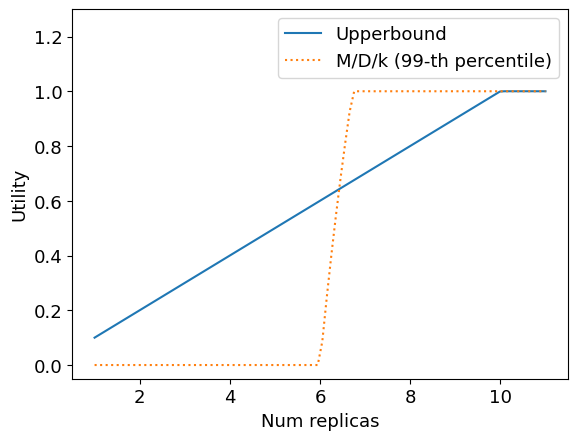

In [15]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 13})
# plt.figure(figsize=(8, 6))

plt.plot(xs, np.clip(np.array(utilities), a_min=None, a_max=1), label="Upperbound")
plt.plot(xs, mdc_utilities_999, label=f"M/D/k ({latency_p}-th percentile)", linestyle="dotted")

# plt.plot(xs, np.clip(np.array(utilities)/0.8, a_min=None, a_max=1), label="0.8rho")
# plt.title(f"Utility w.r.t. num replicas (arrival rate: {int(input_rates.item())}, latency_percentile={latency_p})")
plt.xlabel("Num replicas")
plt.ylabel("Utility")
plt.legend()
plt.ylim((-0.05, 1.3))
# plt.savefig("images/step_func_util.eps", bbox_inches="tight")
plt.savefig("images/inverse_func_util.eps", bbox_inches="tight")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


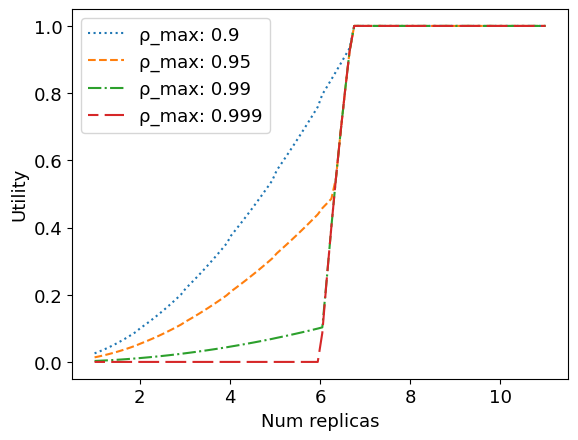

In [16]:
plt.plot(xs, mdc_utilities_90, label=f"ρ_max: 0.9", linestyle="dotted")
plt.plot(xs, mdc_utilities, label=f"ρ_max: 0.95", linestyle="dashed")
plt.plot(xs, mdc_utilities_99, label=f"ρ_max: 0.99", linestyle="dashdot")
plt.plot(xs, mdc_utilities_999, label=f"ρ_max: 0.999", linestyle=(5, (10, 3)))
plt.xlabel("Num replicas")
plt.ylabel("Utility")
plt.legend()
# plt.ylim((-0.05, 1.3))
plt.savefig("images/relaxed_inverse_func_util.eps", bbox_inches="tight")

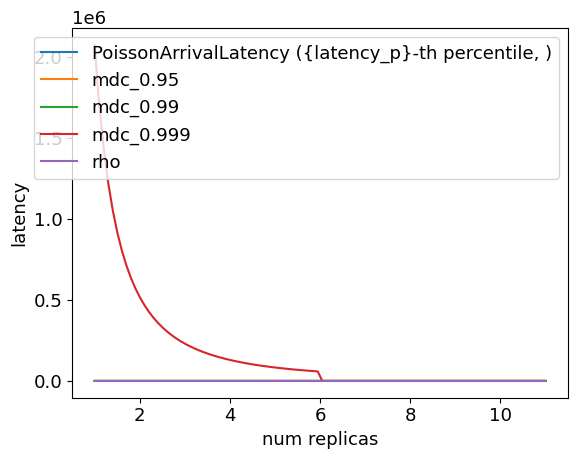

In [17]:
# plt.figure(figsize=(8, 6))
plt.plot(xs, mdc_latencies_90, label="PoissonArrivalLatency ({latency_p}-th percentile, )")
plt.plot(xs, mdc_latencies, label="mdc_0.95")
plt.plot(xs, mdc_latencies_99, label="mdc_0.99")
plt.plot(xs, mdc_latencies_999, label="mdc_0.999")
# plt.plot(xs, np.array(latencies) * 0.8, label="0.8rho")
plt.plot(xs, latencies, label="rho")
# plt.title(f"latency w.r.t. num replicas (lambda: {input_rates.item()}, latency_percentile={latency_p})")
plt.xlabel("num replicas")
plt.ylabel("latency")
# plt.yscale("log")
plt.legend()